In [68]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn import feature_selection as fs

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR

%matplotlib inline

In [31]:
AdvWorksCusts = pd.read_csv('../Data/AdvWorksCusts.csv')
AW_AveMonthSpend = pd.read_csv('../Data/AW_AveMonthSpend.csv')
AdvWorksCusts = AdvWorksCusts.merge(AW_AveMonthSpend, on='CustomerID')
AdvWorksCusts.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [32]:
Features = np.array(pd.read_csv('../PreparedData/AveMonthSpendFeatures.csv'))
Labels = np.array(pd.read_csv('../PreparedData/AveMonthSpendLabels.csv'))
print(Labels[:5]) # Here is the log(AveMonthSpend)
Features_test = np.array(pd.read_csv('../PreparedData/Features_test.csv'))
Features.shape

[[4.48863637]
 [4.76217393]
 [4.81218436]
 [3.91202301]
 [4.55387689]]


(16404, 34)

In [33]:
## Feature Selection
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)
Features_reduced.shape

(16404, 16)

In [34]:
# Split data set
index = ms.train_test_split(range(Features.shape[0]), test_size=round(0.3*Features.shape[0]))
X_train = Features[index[0], :]
y_train = np.ravel(Labels[index[0]])
X_test = Features[index[1], :]
y_test = np.ravel(Labels[index[1]])

In [61]:
## Evaluate the model
def print_metrics(y_true, y_predicted, n_parameters=0):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    #r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    #print('Adjusted R^2           = ' + str(r2_adj))

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count') 
    plt.show()

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual') 
    plt.show()

def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
def print_nested_cross_val_result(cv_estimate):
    print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
    print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
    print('Outcomes by cv fold')
    for i, x in enumerate(cv_estimate):
        print('Fold %2d    %4.3f' % (i+1, x))

# Linear Regression

Mean Square Error      = 0.0037175163823499092
Root Mean Square Error = 0.06097143907068218
Mean Absolute Error    = 0.04548213966347152
Median Absolute Error  = 0.03581329057304394
R^2                    = 0.9694642873852178


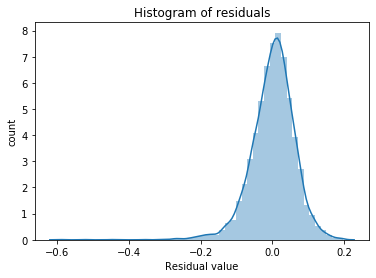

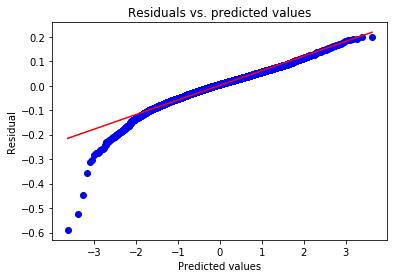

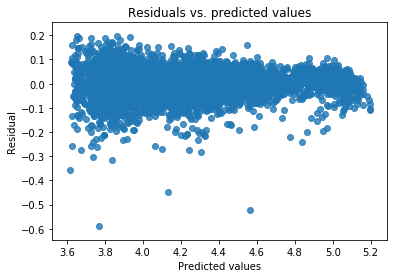

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)

print_metrics(y_test, preds)
hist_resids(y_test, preds)
resid_qq(y_test, preds)
resid_plot(y_test, preds)

# Gradiant Boost

Mean Square Error      = 0.0035676620072309815
Root Mean Square Error = 0.059729908816529946
Mean Absolute Error    = 0.045113161211920445
Median Absolute Error  = 0.03643661735238002
R^2                    = 0.9706951925547082


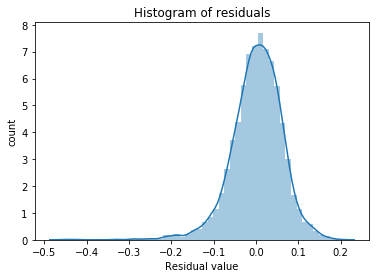

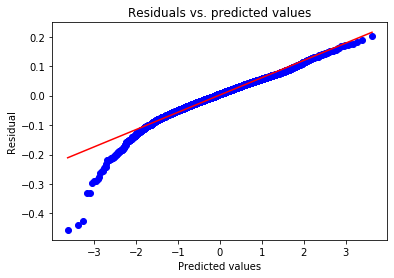

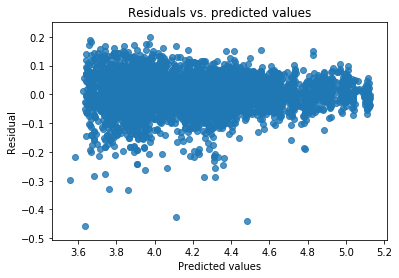

In [66]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
preds = gb_reg.predict(X_test)

print_metrics(y_test, preds)
hist_resids(y_test, preds)
resid_qq(y_test, preds)
resid_plot(y_test, preds)

# Neuarl Network Model

Mean Square Error      = 0.004023754433150639
Root Mean Square Error = 0.06343307050073044
Mean Absolute Error    = 0.04828789071111023
Median Absolute Error  = 0.03912563941368852
R^2                    = 0.9669488453133659


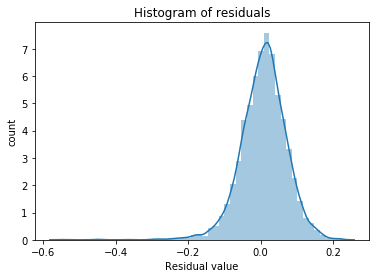

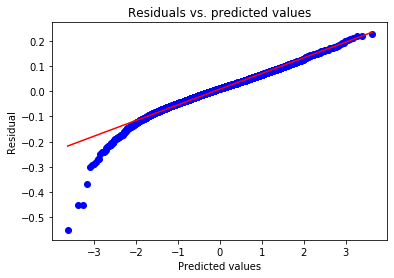

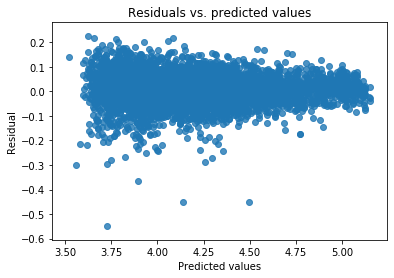

In [70]:
nn_reg = MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100))
nn_reg.fit(X_train, y_train)
preds = nn_reg.predict(X_test)

print_metrics(y_test, preds)
hist_resids(y_test, preds)
resid_qq(y_test, preds)
resid_plot(y_test, preds)

# Random Forest

Mean Square Error      = 0.0034251097267683824
Root Mean Square Error = 0.05852443700513814
Mean Absolute Error    = 0.04322639833221568
Median Absolute Error  = 0.033280712242413024
R^2                    = 0.9718661182537729


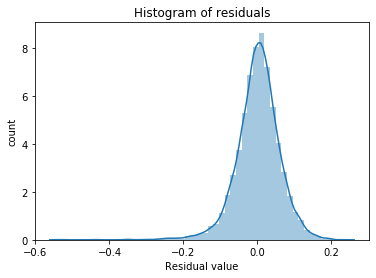

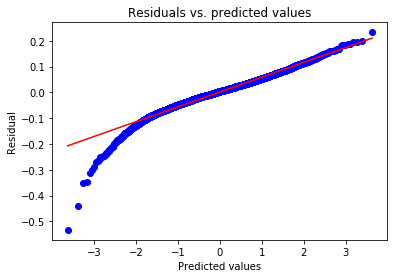

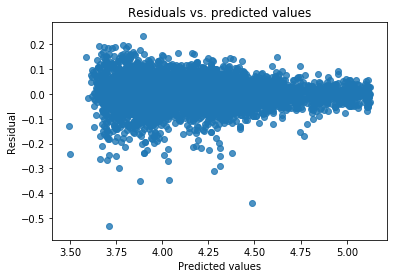

In [72]:
rf_reg = RandomForestRegressor(max_features=1.0, min_samples_leaf=5, n_estimators=100)
rf_reg.fit(X_train, y_train)
preds = rf_reg.predict(X_test)

print_metrics(y_test, preds)
hist_resids(y_test, preds)
resid_qq(y_test, preds)
resid_plot(y_test, preds)